# 📌 Business Understanding

Proyek ini bertujuan untuk membangun model klasifikasi sentimen dari ulasan pengguna terhadap TikTok Tokopedia Seller Center. Dengan memanfaatkan analisis sentimen, kita dapat mengidentifikasi apakah suatu ulasan bersifat positif atau negatif secara otomatis.

* Model ini akan membantu pemilik bisnis atau tim layanan pelanggan untuk:

* Menyaring ulasan negatif dengan cepat

* Mengetahui persepsi umum pengguna

* Mengambil keputusan berbasis data

# 📌 Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📌 Import Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


# 📌 Load Dataset dari Google Drive

In [ ]:
# Ganti path dengan lokasi file kamu di Google Drive
file_path = '/content/drive/MyDrive/UAS PENDAT/Tiktok Tokopedia Seller Center Reviews - Tiktok Tokopedia Seller Center Reviews.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris awal
df.head()


,content,sentiment
0,tolong keuangan transfer rekening berbeda reke...,negative
1,sumpah ya aplikasi seller buruk tuh duitnya la...,negative
2,susah ribet,negative
3,capai bikin dekripsi tolak kacau,negative
4,pelanggaran upload barang,negative


# 📌 Menampilkan Informasi Dataset & Menampilkan Jumlah Data per Label Sentimen

In [ ]:
df.info()
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    3145 non-null   object
 1   sentiment  3145 non-null   object
dtypes: object(2)
memory usage: 49.3+ KB


,count
sentiment,
negative,1755
positive,1390


# 📌 Preprocessing Teks Ulasan

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_content'] = df['content'].apply(clean_text)
df[['clean_content', 'sentiment']].head()


,clean_content,sentiment
0,tolong keuangan transfer rekening berbeda reke...,negative
1,sumpah ya aplikasi seller buruk tuh duitnya la...,negative
2,susah ribet,negative
3,capai bikin dekripsi tolak kacau,negative
4,pelanggaran upload barang,negative


# 📌 Label Encoding

In [ ]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
print(df[['sentiment', 'label']].head())


  sentiment  label
0  negative      0
1  negative      0
2  negative      0
3  negative      0
4  negative      0


# 📌 Vektorisasi Teks dengan TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_content'])
y = df['label']
print(f"Shape fitur TF-IDF: {X.shape}")


Shape fitur TF-IDF: (3145, 3000)


# 📌 Membagi Data Menjadi Data Latih dan Data Uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing : {X_test.shape[0]}")


Jumlah data training: 2516
Jumlah data testing : 629


# 📌 Pelatihan dan Prediksi Model Naive Bayes

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Contoh prediksi:")
for i in range(5):
    print(f"Prediksi: {y_pred[i]}, Asli: {y_test.iloc[i]}")


Contoh prediksi:
Prediksi: 1, Asli: 1
Prediksi: 0, Asli: 1
Prediksi: 0, Asli: 0
Prediksi: 0, Asli: 1
Prediksi: 0, Asli: 0


# 📌 Membuat DataFrame Hasil Prediksi

In [ ]:
test_df = pd.DataFrame({
    'review': df.iloc[y_test.index]['content'].values,
    'true_label': y_test.values,
    'predicted_label': y_pred
})
print(test_df.sample(5))


                                                review  true_label  \
284                                                 ok           1   
1    bahasanya tolong ganti pakai bahasa indonesia ...           1   
16   daftar seller center data pribadi hrays perifi...           0   
145  aplikasi aturan mutu upload produk aturan mutu...           0   
185  payah nih ekspedisi jnt disitu ekspedisi diuba...           0   

     predicted_label  
284                1  
1                  0  
16                 0  
145                0  
185                0  


# 📌 Evaluasi Performa Model

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       371
           1       0.93      0.90      0.92       258

    accuracy                           0.93       629
   macro avg       0.93      0.93      0.93       629
weighted avg       0.93      0.93      0.93       629

Confusion Matrix:


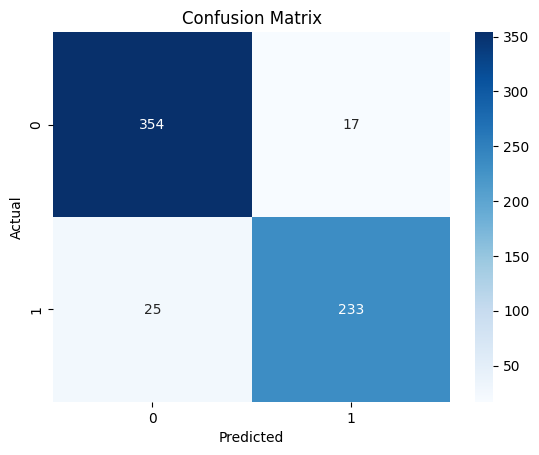

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 📌 Menyimpan Model dan Vectorizer

In [ ]:
import joblib

# Buat path folder tujuan
save_path = '/content/drive/MyDrive/UAS PENDAT'
joblib.dump(vectorizer, '/content/drive/MyDrive/UAS PENDAT/tfidf_vectorizer.pkl')
# Simpan model
joblib.dump(model, f'{save_path}/model_naive_bayes.pkl')

# (Opsional) Simpan juga vectorizer-nya jika ingin dipakai ulang
joblib.dump(vectorizer, f'{save_path}/tfidf_vectorizer.pkl')

print("Model dan vectorizer berhasil disimpan di folder UAS PENDAT.")



Model dan vectorizer berhasil disimpan di folder UAS PENDAT.
